             x         y       yaw     cov11     cov12     cov13     cov21  \
0     0.005593  0.005867  0.000452  0.012416  0.000636  0.000010  0.000636   
1    -0.005024 -0.022411  0.000113  0.012159  0.000103  0.000017  0.000103   
2     0.000302  0.001787 -0.000069  0.012578  0.000142  0.000024  0.000142   
3     0.000800  0.001130  0.000032  0.011715 -0.000092  0.000046 -0.000092   
4     0.001669  0.001535 -0.000172  0.012278 -0.000182  0.000027 -0.000182   
...        ...       ...       ...       ...       ...       ...       ...   
1137 -0.075899 -0.002517  0.000144  0.029425  0.000633 -0.000148  0.000633   
1138 -0.078330 -0.008357 -0.001657  0.028265  0.001312 -0.000207  0.001312   
1139  0.031011  0.017036  0.001768  0.026407 -0.001052 -0.000216 -0.001052   
1140 -0.031116 -0.020896  0.000046  0.025066 -0.001063 -0.000296 -0.001063   
1141 -0.010603 -0.015416  0.000253  0.022617 -0.003170 -0.000165 -0.003170   

         cov22  cov23     cov31  cov32     cov33  epsilon  err2

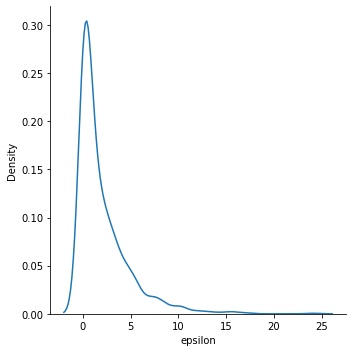

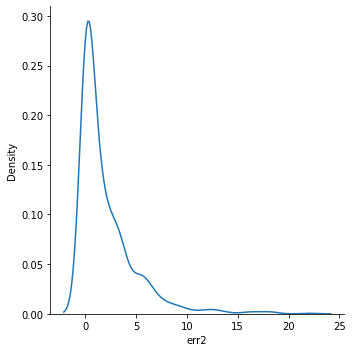

In [31]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv


df = pd.read_csv('./2021-10-05_14:48/est/01.txt_cov.csv', sep=r',', header=0)
df['epsilon']=0.0
df['err2'] = 0.0
#df['norm'] = df['x']*df['x']
print(df)
#sns.scatterplot(data=df, x="x", y="y")



for i, row in df.iterrows():
    df.at[i, 'err2'] = 530.0*(row['x']*row['x'] + row['y']*row['y'] )
    e= [row['x'], row['y'] ] #, row['yaw'] ],
    c=[ [row['cov11'], row['cov12'], row['cov13'] ],
        [row['cov21'], row['cov22'], row['cov23'] ],
        [row['cov31'], row['cov32'], row['cov33'] ] ]
    c2=np.array([ [row['cov11'], row['cov12']],
         [row['cov21'], row['cov22']] ])
    c2=c2*0.08
    I=np.linalg.inv(c2)
    epsilon=np.dot(e,np.matmul(I,np.transpose(e)))
    #print(epsilon)
    df.at[i, 'epsilon'] = epsilon
    #df.at[i,'epsilon'] = epsilon #[0][0]
    #print(df.at[i,'epsilon'])
    
print(df['epsilon'])
    #print(row['c11'], row['c12'], row['c13'])
#sns.displot(data=df, x="x", y="y", kind="hist")
#print(df.mean())
#sns.displot(df, x="cov11", kind="kde")
sns.displot(df, x="epsilon", kind="kde")
sns.displot(df, x="err2", kind="kde")
print(df['epsilon'].mean())
print(df['err2'].mean())
print(df['epsilon'].var())
print(df['err2'].var())
#sns.displot(data=df, x="x", y="y", kind="hist")
#sns.scatterplot(data=df, x="x2", y="cov11")




